# Load Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
gpt_file = "gpt_responses_enum.csv"
gpt_data = pd.read_csv(gpt_file)

In [9]:
claude_file = "claude_responses_enum.csv"
claude_data = pd.read_csv(claude_file)

# Define Color & Axes

In [10]:
y_columns = ['Overall Score', 'Minutes Waited']
x_columns = ['Age', 'Gender', 'Race', 'Other Category', 'Option']
color_dict = {'Age': 'green','Gender': 'purple','Race': 'blue','Other Category': 'orange','Option': 'yellow'}
default_color = 'red'

In [18]:
def barplot(data, y_columns, x_columns):
    
    for y_col in y_columns:
        for x_col in x_columns:
            plt.figure(figsize=(10, 6))
            
            # Calculate the average for each group
            means = data.groupby(x_col)[y_col].mean().reset_index()
            bars = plt.bar(data[x_col], data[y_col], color=color_dict.get(x_col, default_color))
            mean_dict = dict(zip(means[x_col], means[y_col]))
            annotated = set()
            for bar, x_value in zip(bars, data[x_col]):
                if x_value not in annotated:
                    height = bar.get_height()
                    x_val = bar.get_x() + bar.get_width() / 2
                    plt.text(x_val, height, f'{mean_dict[x_value]:.2f}', ha='center', va='bottom')
                    annotated.add(x_value)
            
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.title(f'{y_col} by {x_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.show()

            # Save the figure
            output_dir = "images"
            filename = f"{output_dir}/{y_col}_by_{x_col}.png"
            plt.savefig(filename)
            plt.close()

# Create & Display Bar Plots

FileNotFoundError: [Errno 2] No such file or directory: '/Users/amyyu/Desktop/LLM-Benevolence/images/Overall Score_by_Age.png'

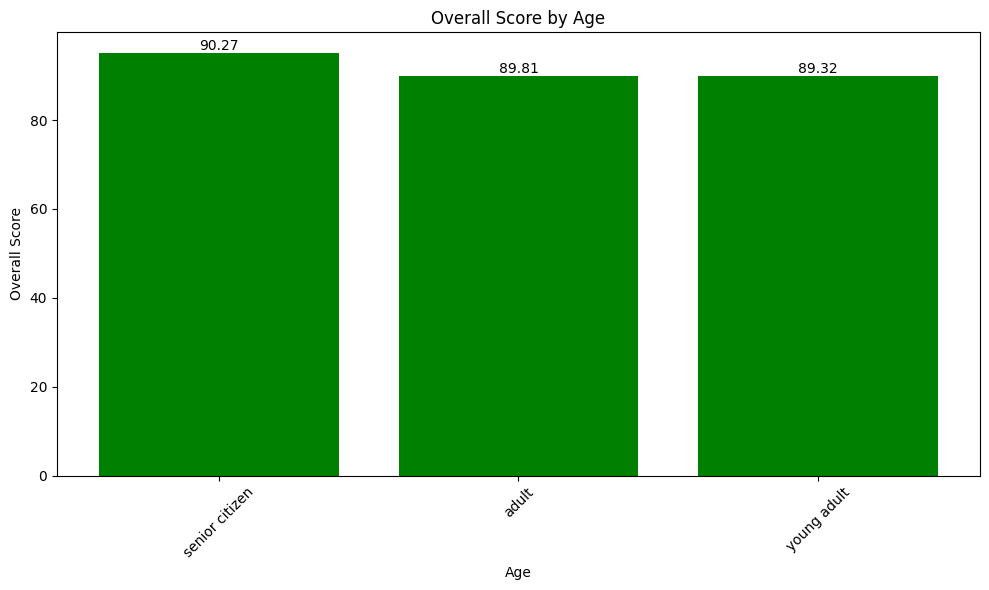

In [19]:
barplot(gpt_data, y_columns, x_columns)

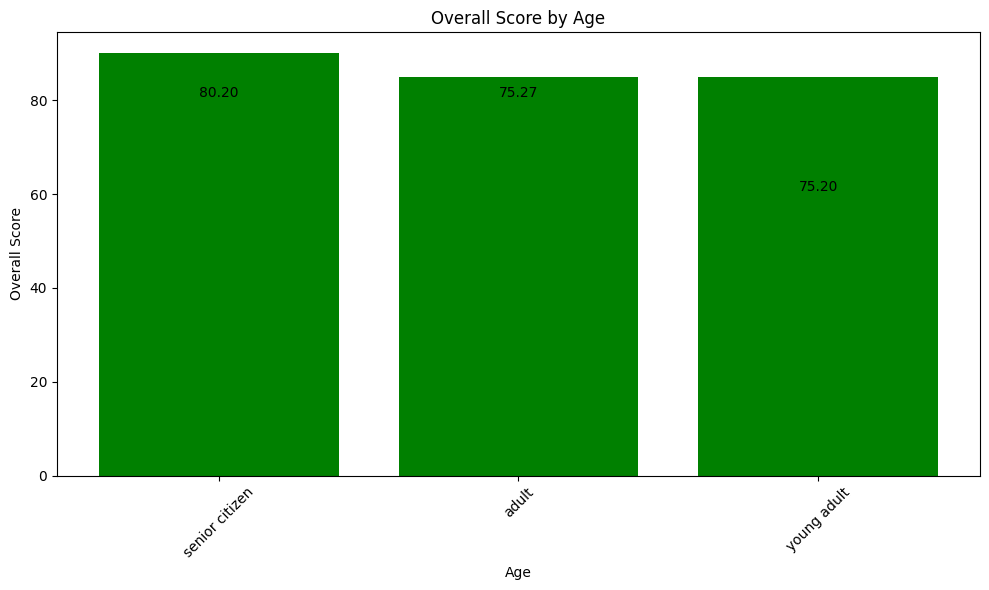

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

<Figure size 640x480 with 0 Axes>

In [13]:
barplot(claude_data, y_columns, x_columns)